In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_digits

In [2]:
def training(iterations, alpha, data, answers,nodes):
    #init weight matrix, bias 
    w = np.zeros((nodes,64))
    b = np.zeros(nodes)
    
    val = []
    
    for i in range(iterations):
        #delayed update 
        w_holder = np.zeros((nodes,64))
        b_holder = np.zeros(nodes)
        
        for j in range(len(data)):
            #equation 
            results = np.dot(w, data[j]) + b
            results[results>0] = 1
            results[results<=0] = 0
            
            #compute error 
            w_holder += np.outer((answers[j] - results), data[j])
            b_holder += (answers[j] - results)

        #update final weight   
        w += alpha*w_holder
        b += alpha*b_holder
    
    
 
        correct, total = 0, 0
        
        #validation 
        for j in range(len(validation_data)):
            results = np.dot(w, validation_data[j]) + b
            results[results>0] = 1
            results[results<=0] = 0
            if sum(results - validation_answers[j]) == 0:
                correct += 1
                total += 1

            else:
                total += 1
        print('validation accuracy:', correct/total)
        val.append(correct/total)
            
    return w, b, val

In [3]:
def data_prep(data,answers,num_list):
    nodes = len(num_list)
    dic = {}

    for i in range(len(num_list)): 
        dic[num_list[i]] = i 
        if i == 0:
            #first time initialize
            dataHolder = data[answers==num_list[i]]
            answersHolder = answers[answers==num_list[i]]
        else: 
            #else append 
            dataHolder = np.concatenate((dataHolder,data[answers==num_list[i]]))
            answersHolder = np.concatenate((answersHolder,answers[answers==num_list[i]])) 
            

       

    return dataHolder,answersHolder,nodes,dic
    

validation accuracy: 0.0
validation accuracy: 0.0
validation accuracy: 0.0
validation accuracy: 0.0
validation accuracy: 0.0
validation accuracy: 0.0
validation accuracy: 0.0
validation accuracy: 0.20334261838440112
validation accuracy: 0.6462395543175488
validation accuracy: 0.7158774373259053
validation accuracy: 0.3147632311977716
validation accuracy: 0.7381615598885793
validation accuracy: 0.7075208913649025
validation accuracy: 0.7353760445682451
validation accuracy: 0.7103064066852368
validation accuracy: 0.7465181058495822
validation accuracy: 0.7325905292479109
validation accuracy: 0.8105849582172702
validation accuracy: 0.754874651810585
validation accuracy: 0.766016713091922
validation accuracy: 0.7409470752089137
validation accuracy: 0.8161559888579387
validation accuracy: 0.7743732590529248
validation accuracy: 0.7632311977715878
validation accuracy: 0.7604456824512534
validation accuracy: 0.83008356545961
validation accuracy: 0.7827298050139275
validation accuracy: 0.81337

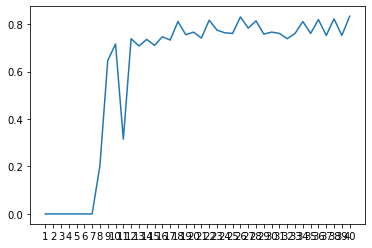

In [4]:
digits = load_digits()
x = digits.data
y = digits.target
numbers = [0,1,2,3,4,5,6,7,8,9]

data,answers,nodes,dic = data_prep(x,y,numbers)



c = list(zip(data, answers))
random.shuffle(c)
data, answers = zip(*c)

data = np.asarray(data)
answers = np.asarray(answers)


train = int(len(data)*.70)
validation = int(len(data)*.20)

training_data = data[:train]/16
validation_data = data[train:train+validation]/16
test_data = data[train+validation:]/16




# to categorical (i.e. turning an 8 into [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
# to categorical (i.e. turning an 8 into [0,1])
training_answers = np.zeros((len(answers[:train]),nodes))
for i in range(len(training_answers)):
    index = dic[answers[:train][i]]
    training_answers[i][index] = 1

validation_answers = np.zeros((len(answers[train:train+validation]),nodes))
for i in range(len(validation_answers)):
    index = dic[answers[train:train+validation][i]]
    validation_answers[i][index] = 1
    
test_answers = np.zeros((len(answers[train+validation:]),nodes))
for i in range(len(test_answers)):
    index = dic[answers[train+validation:][i]]
    test_answers[i][index] = 1

    

w, b, val = training(iterations = 40, alpha = 0.01, data = training_data, answers = training_answers,nodes = nodes)


correct, total = 0, 0
for j in range(len(test_data)):
    results = np.dot(w, test_data[j]) + b
    results[results>0] = 1
    results[results<=0] = 0
    if sum(results - test_answers[j]) == 0:
        correct += 1
        total += 1
        
    else:
        total += 1
    
#     print(results, test_answers[j])

print('test accuracy:',correct/total)

plt.plot(np.linspace(1, len(val), len(val)), val)
plt.xticks(np.linspace(1, len(val), len(val)))
plt.show()
